## **Kenya Regional Crop Yield Prediction Using Machine Learning**

**1. Business Understanding**

**Background**

Agriculture remains one of Kenya’s most critical economic sectors, contributing significantly to GDP, employment, food security, and rural livelihoods. However, crop production in Kenya is highly vulnerable to climate variability, input usage differences, and regional production disparities.

Unpredictable rainfall patterns, temperature fluctuations, and evolving agricultural practices make traditional yield estimation unreliable. Policymakers and agricultural planners often rely on historical trends rather than predictive intelligence, limiting proactive decision-making.

This project applies machine learning techniques to forecast crop yields across major Kenyan regions using historical agricultural production, climate indicators, and pesticide usage data.

## **Problem Statement**

The objective of this project is to develop a supervised machine learning model capable of predicting regional crop yield in Kenya using historical production data, climate variables, and agricultural input usage.

**Objectives**

1. How accurately can regional crop yields be predicted using historical climate and input variables?

2. Which regions are most sensitive to rainfall and temperature variability?

3. How do pesticide usage and harvested area influence yield outcomes?

4. Can yield prediction models provide early warning signals for potential food shortages?

## **Data Sources**

1. Kenya Agricultural Production Dataset (Kaggle)

    https://www.kaggle.com/datasets/samuelkamau/kenyas-agricultural-production-1960-
    2022

-  File: Kenya Agricultural production.xlsx
-  Extracted CSV: kenya_crops_only.csv
-  Columns: Year, Itemcode, Area Harvested in ha, Production in tonnes,
Yield_hg_per_ha
-  Provides historical crop production and yield data.

2. HarvestStat Africa – Regional Crop Data

    https://github.com/HarvestStat/HarvestStat-Africa.git

-  File: adm_crop_production_KE.csv
- Contains regional (admin) crop production data for modeling across Kenya’s main
regions.

3. Climate Data (OpenAfrica)

    https://open.africa/dataset/1106e169-24ab-404e-bdbf-42a7e2f77c6c/resource/25acacc5
    -c606-4958-9c8a-1b7d6b12d66d/download/kenya-climate-data-1991-2016-rainfallmm.c
    sv

    https://open.africa/dataset/1106e169-24ab-404e-bdbf-42a7e2f77c6c/resource/6ddd6aa0
    -fa30-44fa-85a1-ecb1d2bc4e05/download/kenya-climate-data-1991-2016-temp-degresscelcius.csv

-  Temperature data (1991–2026)
-  Rainfall data (1991–2026)
- Captures environmental effects on crop yield.

4. Pesticide Usage Data (KAPSARC Data Portal)

    https://datasource.kapsarc.org/explore/dataset/environment_pesticides_e_all_data/ex
    port/?disjunctive.item&disjunctive.element
    
- Kenya-specific data from 1999–2022
-  Represents agricultural input intensity.

All datasets were aligned between 1999 and 2022 and merged by year and region.

## **Proposed Solution**

1. Machine Learning Yield Prediction Model

    -  Forecast crop yield for specific regions and crops.

2. Regional Insights

    -  Feature importance analysis to understand climate sensitivity and regional
       yield variability.
3. Future Deployment

    -  Streamlit web application allowing users to select region and crop, input
       climate and input values, and receive predicted yield instantl

## **DATA LOADING**

In this section, we import all required datasets, including crop production, regional yield data, climate records, and pesticide usage.

These datasets provide the core variables needed to model crop yield:
- Agricultural output
- Regional production patterns
- Environmental conditions
- Input intensity


In [1]:
# Importing core libraries for data manipulation, visualization, and modeling
import openpyxl # Reading the excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle



In [2]:
# Reading the excel file

# read_file = pd.read_excel("data\Kenyas_Agricultural_Production.xlsx")

# read_file.to_csv("Crop_Yields.csv", index=None, header=True) # changed it to csv

# df = pd.DataFrame(pd.read_csv("Crop_Yields.csv"))

In [3]:
# Reading the Crop_Yields.csv file
Crop_Yields = pd.read_csv('data\Crop_Yields.csv')
Crop_Yields.head(20)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,404,Kenya,5510,Production,1929.07,"Abaca, manila hemp, raw",1976,1976,tonnes,10.00,E,Estimated value
1,QCL,Crops and livestock products,404,Kenya,5510,Production,1929.07,"Abaca, manila hemp, raw",1977,1977,tonnes,10.00,E,Estimated value
2,QCL,Crops and livestock products,404,Kenya,5510,Production,1929.07,"Abaca, manila hemp, raw",1978,1978,tonnes,10.00,E,Estimated value
3,QCL,Crops and livestock products,404,Kenya,5510,Production,1929.07,"Abaca, manila hemp, raw",1979,1979,tonnes,10.00,E,Estimated value
4,QCL,Crops and livestock products,404,Kenya,5510,Production,1929.07,"Abaca, manila hemp, raw",1980,1980,tonnes,10.00,E,Estimated value
5,QCL,Crops and livestock products,404,Kenya,5510,Production,1929.07,"Abaca, manila hemp, raw",1981,1981,tonnes,10.00,E,Estimated value
6,QCL,Crops and livestock products,404,Kenya,5510,Production,1929.07,"Abaca, manila hemp, raw",1982,1982,tonnes,10.00,E,Estimated value
7,QCL,Crops and livestock products,404,Kenya,5510,Production,1929.07,"Abaca, manila hemp, raw",1983,1983,tonnes,20.00,E,Estimated value
8,QCL,Crops and livestock products,404,Kenya,5510,Production,1929.07,"Abaca, manila hemp, raw",1984,1984,tonnes,35.00,E,Estimated value
9,QCL,Crops and livestock products,404,Kenya,5510,Production,1929.07,"Abaca, manila hemp, raw",1985,1985,tonnes,40.00,E,Estimated value


In [4]:
# Specifying the crops needed
crop_list = [
    'Abaca,manila hemp, raw',
    'Anise,badian, coriander, cumin, caraway, fennel and juniper berries, raw',
    'Apples',
    'Apricots',
    'Artichokes',
    'Asparagus',
    'Avocados',
    'Barley',
    'Bananas',
    'Beer of barley, malted',
    'Broad beans and horse beans, green',
    'Cabbages',
    'Cashew nuts, in shell',
    'Castor oil seeds',
    'Carrots and turnips',
    'Cauliflowers and broccolli',
    'Chestnuts, in shell',
    'Chick peas, dry',
    'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw',
    'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
    'Cloves (whole stems), raw',
    'Coconuts, in shell',
    'Coffee, green',
    'Cotton lint, ginned',
    'Cotton seed',
    'Cottonseed oil',
    'Cow peas, dry',
    'Cucumbers and gherkins',
    'Ginger, raw',
    'Dates',
    'Green garlic',
    'Green tea (not fermented), black tea (fermented) and partly fermented tea',
    'Groundnuts, excluding shelled',
    'Leeks and other alliaceous vegetables',
    'Lemons and limes',
    'Lentils, dry',
    'Lettuce and chicory',
    'Linseed',
    'Mangoes, guavas and mangosteens',
    'Maize (corn)',
    'Millet',
    'Mushrooms and truffles',
    'Nutmeg, mace, cardamoms, raw',
    'Oats',
    'Onions and shallots, dry (excluding dehydrated)',
    'Oranges',
    'Papayas',
    'Peaches and nectarines',
    'Pears',
    'Peas, green',
    'Wheat', 
    'Potatoes', 
    'Beans, dry', 
    'Cassava, fresh', 
    'Sorghum', 
    'Millet', 
    'Sweet potatoes',
    'Pepper (Piper spp.), raw',
    'Pigeon peas, dry',
    'Pineapples',
    'Plantains and cooking bananas',
    'Plums and sloes',
    'Pomelos and grapefruits',
    'Pyrethrum, dried flowers',
    'Rice',
    'Seed cotton, unginned',
    'Sesame seed',
    'Soya beans',
    'Spinach',
    'Strawberries',
    'Sugar cane',
    'Sunflower seed',
    'Tangerines, mandarins, clementines',
    'Tea leaves',
    'Tomatoes',
    'Unmanufactured tobacco',
    'Vanilla, raw',
    'Watermelons',
    'Yams'
]

# Filter the dataset for the crops
crops_df = Crop_Yields[Crop_Yields['Item'].isin(crop_list)].copy()

# Pivot the Element column so each row has Production, Area Harvested, and Yield
pivot_df = crops_df.pivot_table(
    index=['Year', 'Item', 'Item Code (CPC)'],
    columns='Element',
    values='Value'
).reset_index()

# Clean column names
pivot_df.columns.name = None
pivot_df.rename(columns={
    'Production': 'Production_tonnes',
    'Area harvested': 'Area_Harvested_ha',
    'Yield': 'Yield_hg_per_ha'
}, inplace=True)

In [5]:
pivot_df.head()

,Year,Item,Item Code (CPC),Area_Harvested_ha,Production_tonnes,Yield_hg_per_ha
0,1961,Apricots,1343,2.0,10.0,50000.0
1,1961,Avocados,1311,1100.0,16000.0,145455.0
2,1961,Bananas,1312,40000.0,400000.0,100000.0
3,1961,Barley,115,12666.0,13513.0,10669.0
4,1961,"Beans, dry",1701,115000.0,55000.0,4783.0


In [6]:
# pivot_df.to_csv('kenya_crops_only.csv', index=False)

## **DATA UNDERSTANDING**


**Overview**

- This project integrates multiple datasets to analyze and predict regional crop yields in Kenya. The datasets capture agricultural production, climate conditions, and input usage, enabling a comprehensive view of factors influencing yield variability.

- Understanding the structure, scope, and limitations of each dataset is essential before cleaning, merging, and modeling.

**Datasets Used**

**1. Agricultural Production Data**

- This dataset contains crop production statistics at national level.

*Key variables:*

- Year — reporting year

- Item — crop type

- Element — production metric (Production, Area harvested, Yield)

**Purpose:**
Provides core production metrics used to compute and validate yield.

**2. Regional Crop Production Data**

- This dataset provides crop production at the administrative region level.

*Key variables:*

- Region — administrative region

- Crop — crop type

- Year — production year

- Production — total output

- Area — harvested area

**Purpose:**
Enables regional analysis and modeling of yield variability.

**3. Climate Data (Rainfall & Temperature)**

- Climate datasets capture environmental conditions affecting crop growth.

*Key variables:*

- Year

- Month

- Rainfall (mm)

- Temperature (°C)

**Purpose:**
Quantifies climate variability and its influence on agricultural productivity.

**4. Pesticide Usage Data**

- Represents agricultural input intensity over time.

*Key variables:*

- Year

- Pesticide usage

**Purpose:**
Serves as a proxy for crop protection intensity and input-driven yield improvements.

**Initial Observations**

- Production and area values vary widely across regions and crops.

- Numeric variables exhibit right-skewed distributions, indicating the presence of extreme values.

- Climate data shows seasonal patterns that align with Kenya’s long and short rain cycles.

- Some datasets have missing or inconsistent regional coverage.

**Data Limitations**

- Climate records may not cover all years present in production data.

- Pesticide data may be aggregated at national level, limiting regional precision.

- Differences in reporting standards may require unit standardization.

- Missing values and skewed distributions require careful handling during preprocessing.

In [7]:
# Reading the data
Kenya_Crops = pd.read_csv('data\kenya_crops_only.csv', encoding='latin-1')
Kenya_Crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3658 non-null   int64  
 1   Item               3658 non-null   object 
 2   Item Code (CPC)    3658 non-null   float64
 3   Area_Harvested_ha  3377 non-null   float64
 4   Production_tonnes  3658 non-null   float64
 5   Yield_hg_per_ha    3317 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 171.6+ KB


In [8]:
Kenya_Crops.head()

,Year,Item,Item Code (CPC),Area_Harvested_ha,Production_tonnes,Yield_hg_per_ha
0,1961,Apricots,1343.0,2.0,10.0,50000.0
1,1961,Avocados,1311.0,1100.0,16000.0,145455.0
2,1961,Bananas,1312.0,40000.0,400000.0,100000.0
3,1961,Barley,115.0,12666.0,13513.0,10669.0
4,1961,"Beans, dry",1701.0,115000.0,55000.0,4783.0


In [9]:
Pesticides_df = pd.read_csv('data\environment_pesticides_e_all_data.csv', sep=';', encoding='utf-8-sig')
Pesticides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             100004 non-null  int64  
 1   Area             100004 non-null  object 
 2   Item             100004 non-null  object 
 3   Element          100004 non-null  object 
 4   Value            100004 non-null  float64
 5   Unit             100004 non-null  object 
 6   Area Code (M49)  99674 non-null   object 
 7   Note             100004 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.1+ MB


In [10]:
Pesticides_df.head()

,Year,Area,Item,Element,Value,Unit,Area Code (M49),Note
0,2005,United Kingdom of Great Britain and Northern I...,Pesticides (total),Use per area of cropland,5.44,kg/ha,826-01-01,Estimated Value
1,2012,United Kingdom of Great Britain and Northern I...,Pesticides (total),Use per area of cropland,2.83,kg/ha,826-01-01,Estimated Value
2,2021,United Kingdom of Great Britain and Northern I...,Pesticides (total),Use per area of cropland,2.44,kg/ha,826-01-01,Estimated Value
3,1993,United Kingdom of Great Britain and Northern I...,Pesticides (total),Use per capita,0.56,kg/cap,826-01-01,Estimated Value
4,2002,United Kingdom of Great Britain and Northern I...,Pesticides (total),Use per capita,0.52,kg/cap,826-01-01,Estimated Value


In [11]:
Region_Yield = pd.read_csv(r'data\adm_crop_production_KE.csv')
Region_Yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43758 entries, 0 to 43757
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              43758 non-null  int64  
 1   fnid                    43758 non-null  object 
 2   country                 43758 non-null  object 
 3   country_code            43758 non-null  object 
 4   admin_1                 43758 non-null  object 
 5   admin_2                 43758 non-null  object 
 6   name                    43758 non-null  object 
 7   product                 43758 non-null  object 
 8   season_name             43758 non-null  object 
 9   planting_year           43758 non-null  int64  
 10  planting_month          43758 non-null  int64  
 11  harvest_year            43758 non-null  int64  
 12  harvest_month           43758 non-null  int64  
 13  crop_production_system  43758 non-null  object 
 14  indicator               43758 non-null

In [12]:
Region_Yield.head(10)

,Unnamed: 0,fnid,country,country_code,admin_1,admin_2,name,product,season_name,planting_year,planting_month,harvest_year,harvest_month,crop_production_system,indicator,value
0,0,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Kale,Annual,2022,1,2022,12,All (PS),area,21.0
1,1,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Watermelon,Annual,2022,1,2022,12,All (PS),area,26.0
2,2,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Banana,Annual,2012,1,2012,12,All (PS),area,125.1
3,3,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Banana,Annual,2013,1,2013,12,All (PS),area,121.5
4,4,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Banana,Annual,2022,1,2022,12,All (PS),area,39.0
5,5,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Coconut (in shell),Annual,2012,1,2012,12,All (PS),area,6165.0
6,6,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Coconut (in shell),Annual,2013,1,2013,12,All (PS),area,6165.0
7,7,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Coconut (in shell),Annual,2014,1,2014,12,All (PS),area,100.0
8,8,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Coconut (in shell),Annual,2015,1,2015,12,All (PS),area,159.0
9,9,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Coconut (in shell),Annual,2016,1,2016,12,All (PS),area,168.0


In [13]:
Temp_df = pd.read_csv('data\kenya-climate-data-1991-2016-temp-degress-celcius.csv')
Temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     312 non-null    int64  
 1   Month Average            312 non-null    object 
 2   Temperature - (Celsius)  312 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.4+ KB


In [14]:
Rainfall_df = pd.read_csv('data\kenya-climate-data-1991-2016-rainfallmm.csv')
Rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             312 non-null    int64  
 1   Month Average    312 non-null    object 
 2   Rainfall - (MM)  312 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.4+ KB


In [15]:
# Extracting the Kenyan data from pesticides dataset
Kenyan_data = Pesticides_df[Pesticides_df['Area'] == 'Kenya']
Kenyan_data.head(20)

,Year,Area,Item,Element,Value,Unit,Area Code (M49),Note
4927,1999,Kenya,Pesticides (total),Agricultural Use,2124.00,t,404-01-01,Estimated using net trade
4928,2002,Kenya,Pesticides (total),Agricultural Use,1665.40,t,404-01-01,Estimated using net trade
4929,2006,Kenya,Pesticides (total),Agricultural Use,2192.58,t,404-01-01,Estimated using net trade
4930,2008,Kenya,Pesticides (total),Agricultural Use,2157.53,t,404-01-01,Estimated using net trade
4931,2014,Kenya,Pesticides (total),Agricultural Use,4660.68,t,404-01-01,Estimated using net trade
4932,1992,Kenya,Pesticides (total),Use per area of cropland,0.23,kg/ha,404-01-01,Estimated Value
4933,1999,Kenya,Pesticides (total),Use per area of cropland,0.38,kg/ha,404-01-01,Estimated Value
4934,2003,Kenya,Pesticides (total),Use per area of cropland,0.31,kg/ha,404-01-01,Estimated Value
4935,2021,Kenya,Pesticides (total),Use per area of cropland,0.76,kg/ha,404-01-01,Estimated Value
4936,1992,Kenya,Pesticides (total),Use per capita,0.05,kg/cap,404-01-01,Estimated Value


In [16]:
Kenyan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 4927 to 83709
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             264 non-null    int64  
 1   Area             264 non-null    object 
 2   Item             264 non-null    object 
 3   Element          264 non-null    object 
 4   Value            264 non-null    float64
 5   Unit             264 non-null    object 
 6   Area Code (M49)  264 non-null    object 
 7   Note             264 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 18.6+ KB


## **DATA CLEANING**

**Overview**

The data cleaning phase ensures consistency, accuracy, and usability of the datasets before merging and modeling. Given the multiple sources used in this project, preprocessing steps were necessary to handle missing values, standardize formats, and align variables across datasets.

In [17]:
# Cleaning the Kenya_Crops dataset
Kenya_Crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3658 non-null   int64  
 1   Item               3658 non-null   object 
 2   Item Code (CPC)    3658 non-null   float64
 3   Area_Harvested_ha  3377 non-null   float64
 4   Production_tonnes  3658 non-null   float64
 5   Yield_hg_per_ha    3317 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 171.6+ KB


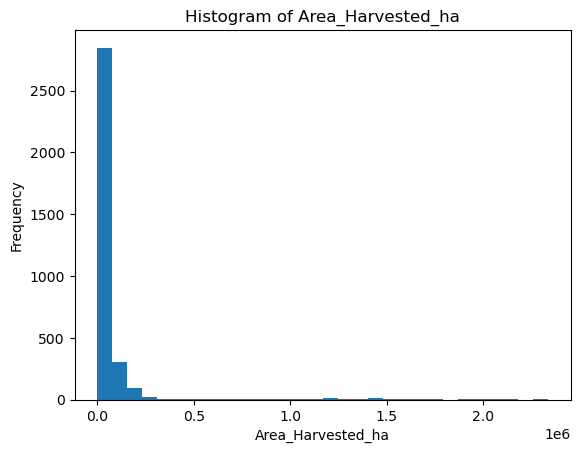

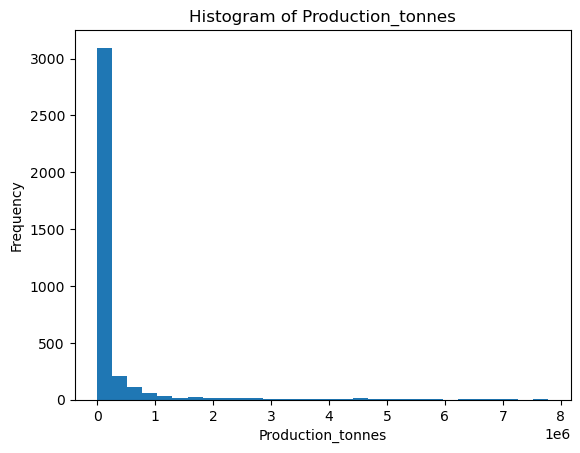

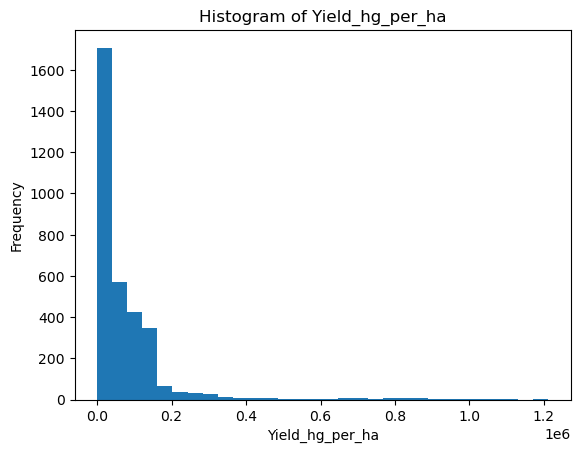

In [18]:
# Visualizing the data to check on skewness
import matplotlib.pyplot as plt
cols = ["Area_Harvested_ha", "Production_tonnes", "Yield_hg_per_ha"]

for col in cols:
    plt.figure()
    plt.hist(Kenya_Crops[col].dropna(), bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    The are all right skewed meaning median is safer since it is robust to outliers and better represents central tendency for skewed agricultural data.

In [19]:
# Filling using median
Kenya_Crops['Area_Harvested_ha'].fillna(Kenya_Crops['Area_Harvested_ha'].median(), inplace=True)
Kenya_Crops['Yield_hg_per_ha'].fillna(Kenya_Crops['Yield_hg_per_ha'].median(), inplace=True)

C:\Users\Sheilla Macharia\AppData\Local\Temp\ipykernel_12280\1978724881.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Kenya_Crops['Area_Harvested_ha'].fillna(Kenya_Crops['Area_Harvested_ha'].median(), inplace=True)
C:\Users\Sheilla Macharia\AppData\Local\Temp\ipykernel_12280\1978724881.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate ob

In [20]:
Kenya_Crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3658 non-null   int64  
 1   Item               3658 non-null   object 
 2   Item Code (CPC)    3658 non-null   float64
 3   Area_Harvested_ha  3658 non-null   float64
 4   Production_tonnes  3658 non-null   float64
 5   Yield_hg_per_ha    3658 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 171.6+ KB


## **MERGING THE DATASETS**

    First merging will be between the kenya crops csv and the region yield csv using the crops.
    The 6 crops we settled on
        1. Maize
        2. Wheat
        3. Tea
        4. Sugarcane
        5. Rice
        6. Sorghum


In [21]:
Region_Yield.head(10)

,Unnamed: 0,fnid,country,country_code,admin_1,admin_2,name,product,season_name,planting_year,planting_month,harvest_year,harvest_month,crop_production_system,indicator,value
0,0,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Kale,Annual,2022,1,2022,12,All (PS),area,21.0
1,1,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Watermelon,Annual,2022,1,2022,12,All (PS),area,26.0
2,2,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Banana,Annual,2012,1,2012,12,All (PS),area,125.1
3,3,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Banana,Annual,2013,1,2013,12,All (PS),area,121.5
4,4,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Banana,Annual,2022,1,2022,12,All (PS),area,39.0
5,5,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Coconut (in shell),Annual,2012,1,2012,12,All (PS),area,6165.0
6,6,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Coconut (in shell),Annual,2013,1,2013,12,All (PS),area,6165.0
7,7,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Coconut (in shell),Annual,2014,1,2014,12,All (PS),area,100.0
8,8,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Coconut (in shell),Annual,2015,1,2015,12,All (PS),area,159.0
9,9,KE2013A101,Kenya,KE,Mombasa,none,Mombasa,Coconut (in shell),Annual,2016,1,2016,12,All (PS),area,168.0


In [22]:
Region_Yield['season_name'].unique()

array(['Annual', 'Long', 'Short'], dtype=object)

In [23]:
Region_Yield['indicator'].unique()

array(['area', 'production', 'yield'], dtype=object)

In [24]:
YEARS = range(2000, 2022)
CROPS = ['Maize', 'Wheat', 'Tea', 'Sugarcane', 'Rice', 'Sorghum']


In [25]:
# Keep only records within the study period and crops of interest
base = Region_Yield[
    (Region_Yield['planting_year'].between(2000, 2022)) & # restrict years for consistency
    (Region_Yield['harvest_year'] == Region_Yield['planting_year']) &  # ensure same-season harvest
    (Region_Yield['product'].isin(CROPS)) # keep selected major crops
].copy()

# Rename columns for clarity and consistency across datasets
base.rename(columns={
    'product':'Item', # aligns with crop dataset naming
    'admin_1':'Region', # clearer geographic label
}, inplace=True)

# Create a unified Year column for merging
base['Year'] = base['planting_year']


In [26]:
base_wide = (
    base
    .pivot_table(
        index=['Region','Item','Year', 'season_name'], 
        columns='indicator', # area, production and yield become columns
        values='value',
        aggfunc='sum' # sum in case of duplicates
    )
    .reset_index()
)
base_wide.head(20)

indicator,Region,Item,Year,season_name,area,production,yield
0,Baringo,Maize,2000,Annual,20500.000000,47997.000000,2.341317
1,Baringo,Maize,2000,Long,2550.000000,1170.000000,0.458824
2,Baringo,Maize,2001,Annual,19650.000000,27614.000000,1.405293
3,Baringo,Maize,2001,Long,10400.000000,22446.000000,2.158269
4,Baringo,Maize,2002,Annual,18151.666508,26385.076714,1.453590
5,Baringo,Maize,2003,Annual,23996.000000,31926.000000,1.330472
6,Baringo,Maize,2004,Annual,13795.000000,54904.100000,3.980000
7,Baringo,Maize,2005,Annual,20550.000000,46242.000000,2.250219
8,Baringo,Maize,2012,Annual,29117.000000,55805.040000,1.916579
9,Baringo,Maize,2013,Annual,34960.000000,34959.960000,0.999999


In [27]:
# Compute yield (hg/ha) from production and area
# Ensures a consistent yield metric across datasets

base_wide['yield_hg_per_ha'] = (
    base_wide['production'] * 10000 # convert tonnes to hectograms
) / base_wide['area']


In [28]:
base_wide.head(20)

indicator,Region,Item,Year,season_name,area,production,yield,yield_hg_per_ha
0,Baringo,Maize,2000,Annual,20500.000000,47997.000000,2.341317,23413.170732
1,Baringo,Maize,2000,Long,2550.000000,1170.000000,0.458824,4588.235294
2,Baringo,Maize,2001,Annual,19650.000000,27614.000000,1.405293,14052.926209
3,Baringo,Maize,2001,Long,10400.000000,22446.000000,2.158269,21582.692308
4,Baringo,Maize,2002,Annual,18151.666508,26385.076714,1.453590,14535.897683
5,Baringo,Maize,2003,Annual,23996.000000,31926.000000,1.330472,13304.717453
6,Baringo,Maize,2004,Annual,13795.000000,54904.100000,3.980000,39800.000000
7,Baringo,Maize,2005,Annual,20550.000000,46242.000000,2.250219,22502.189781
8,Baringo,Maize,2012,Annual,29117.000000,55805.040000,1.916579,19165.793179
9,Baringo,Maize,2013,Annual,34960.000000,34959.960000,0.999999,9999.988558


In [29]:
base_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           2250 non-null   object 
 1   Item             2250 non-null   object 
 2   Year             2250 non-null   int64  
 3   season_name      2250 non-null   object 
 4   area             2250 non-null   float64
 5   production       2210 non-null   float64
 6   yield            2210 non-null   float64
 7   yield_hg_per_ha  2210 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 140.8+ KB


In [30]:
# Remove " Average" text for easier parsing
Temp_df['month_short'] = Temp_df['Month Average'].str.replace(' Average','', regex=False)
Rainfall_df['month_short'] = Rainfall_df['Month Average'].str.replace(' Average','', regex=False)

# Map month abbreviations to numeric values for aggregation
month_map = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,
             'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

Temp_df['month'] = Temp_df['month_short'].map(month_map)
Rainfall_df['month'] = Rainfall_df['month_short'].map(month_map)

# verify mapping worked
print(Temp_df[['Month Average','month_short','month']].head(12))
print(Rainfall_df[['Month Average','month_short','month']].head(12))


   Month Average month_short  month
0    Jan Average         Jan      1
1    Feb Average         Feb      2
2    Mar Average         Mar      3
3    Apr Average         Apr      4
4    May Average         May      5
5    Jun Average         Jun      6
6    Jul Average         Jul      7
7    Aug Average         Aug      8
8    Sep Average         Sep      9
9    Oct Average         Oct     10
10   Nov Average         Nov     11
11   Dec Average         Dec     12
   Month Average month_short  month
0    Jan Average         Jan      1
1    Feb Average         Feb      2
2    Mar Average         Mar      3
3    Apr Average         Apr      4
4    May Average         May      5
5    Jun Average         Jun      6
6    Jul Average         Jul      7
7    Aug Average         Aug      8
8    Sep Average         Sep      9
9    Oct Average         Oct     10
10   Nov Average         Nov     11
11   Dec Average         Dec     12


In [31]:

# CREATE SEASONAL CLIMATE FEATURES
def seasonal_climate(temp_df, rain_df, month, label):
    # Average temperature for the season
    t = temp_df[temp_df['month'].isin(month)].groupby('Year', as_index=False)['Temperature - (Celsius)'].mean()
    # Total rainfall for the season
    r = rain_df[rain_df['month'].isin(month)].groupby('Year', as_index=False)['Rainfall - (MM)'].sum()
    # Merge temperature and rainfall
    df = pd.merge(t, r, on='Year', how='outer')  # use outer to preserve all years
    df['season_name'] = label
    return df

# Create seasonal climate datasets aligned with Kenyan growing seasons
long_clim = seasonal_climate(Temp_df, Rainfall_df, [3,4,5,6,7,8], 'Long')
short_clim = seasonal_climate(Temp_df, Rainfall_df, [10,11,12], 'Short')
annual_clim = seasonal_climate(Temp_df, Rainfall_df, list(range(1,13)), 'Annual')

# Combine all seasons into one dataset
climate = pd.concat([long_clim, short_clim, annual_clim], ignore_index=True)

# Check
print(climate['season_name'].unique())
print(climate.head())


['Long' 'Short' 'Annual']
   Year  Temperature - (Celsius)  Rainfall - (MM) season_name
0  1991                24.407967         371.8503        Long
1  1992                24.515367         310.7993        Long
2  1993                24.485000         299.3617        Long
3  1994                24.357817         351.3330        Long
4  1995                24.687967         369.5545        Long


In [32]:
final = base_wide.merge(
    climate,
    on=['Year','season_name'],
    how='left'
)


In [33]:
final.head(20)

,Region,Item,Year,season_name,area,production,yield,yield_hg_per_ha,Temperature - (Celsius),Rainfall - (MM)
0,Baringo,Maize,2000,Annual,20500.000000,47997.000000,2.341317,23413.170732,24.904750,448.51506
1,Baringo,Maize,2000,Long,2550.000000,1170.000000,0.458824,4588.235294,24.955150,243.42790
2,Baringo,Maize,2001,Annual,19650.000000,27614.000000,1.405293,14052.926209,25.095758,622.51956
3,Baringo,Maize,2001,Long,10400.000000,22446.000000,2.158269,21582.692308,24.650217,320.87500
4,Baringo,Maize,2002,Annual,18151.666508,26385.076714,1.453590,14535.897683,25.478067,780.85290
5,Baringo,Maize,2003,Annual,23996.000000,31926.000000,1.330472,13304.717453,25.454358,616.82425
6,Baringo,Maize,2004,Annual,13795.000000,54904.100000,3.980000,39800.000000,25.312442,552.58700
7,Baringo,Maize,2005,Annual,20550.000000,46242.000000,2.250219,22502.189781,25.329817,434.60670
8,Baringo,Maize,2012,Annual,29117.000000,55805.040000,1.916579,19165.793179,25.245150,756.21300
9,Baringo,Maize,2013,Annual,34960.000000,34959.960000,0.999999,9999.988558,25.182175,769.69140


In [34]:
# HANDLE MISSING CLIMATE YEARS

# Climate data only exists up to 2016, compute seasonal averages
climate_existing = climate[climate['Year'] <= 2016]

# Compute mean temperature and rainfall per season
seasonal_means = (
    climate_existing
    .groupby('season_name')[['Temperature - (Celsius)','Rainfall - (MM)']]
    .mean()
    .reset_index()
)

print(seasonal_means)


  season_name  Temperature - (Celsius)  Rainfall - (MM)
0      Annual                25.118588       657.609658
1        Long                24.901159       347.449854
2       Short                25.184171       224.883414


In [35]:
# Create rows for missing years (2017–2022)
import itertools
years_missing = list(range(2017, 2023))
seasons = ['Annual','Long','Short']

# Create all combinations
rows = list(itertools.product(years_missing, seasons))
climate_missing = pd.DataFrame(rows, columns=['Year','season_name'])


In [36]:
# Fill missing years using seasonal averages
climate_missing = climate_missing.merge(seasonal_means, on='season_name', how='left')


In [37]:
# Combine observed and imputed climate data
climate_full = pd.concat([climate_existing, climate_missing], ignore_index=True)

# sort
climate_full = climate_full.sort_values(['Year','season_name']).reset_index(drop=True)


In [38]:
final = base_wide.merge(climate_full, on=['Year','season_name'], how='left')


In [39]:
final.head(20)

,Region,Item,Year,season_name,area,production,yield,yield_hg_per_ha,Temperature - (Celsius),Rainfall - (MM)
0,Baringo,Maize,2000,Annual,20500.000000,47997.000000,2.341317,23413.170732,24.904750,448.515060
1,Baringo,Maize,2000,Long,2550.000000,1170.000000,0.458824,4588.235294,24.955150,243.427900
2,Baringo,Maize,2001,Annual,19650.000000,27614.000000,1.405293,14052.926209,25.095758,622.519560
3,Baringo,Maize,2001,Long,10400.000000,22446.000000,2.158269,21582.692308,24.650217,320.875000
4,Baringo,Maize,2002,Annual,18151.666508,26385.076714,1.453590,14535.897683,25.478067,780.852900
5,Baringo,Maize,2003,Annual,23996.000000,31926.000000,1.330472,13304.717453,25.454358,616.824250
6,Baringo,Maize,2004,Annual,13795.000000,54904.100000,3.980000,39800.000000,25.312442,552.587000
7,Baringo,Maize,2005,Annual,20550.000000,46242.000000,2.250219,22502.189781,25.329817,434.606700
8,Baringo,Maize,2012,Annual,29117.000000,55805.040000,1.916579,19165.793179,25.245150,756.213000
9,Baringo,Maize,2013,Annual,34960.000000,34959.960000,0.999999,9999.988558,25.182175,769.691400


In [40]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region                   2250 non-null   object 
 1   Item                     2250 non-null   object 
 2   Year                     2250 non-null   int64  
 3   season_name              2250 non-null   object 
 4   area                     2250 non-null   float64
 5   production               2210 non-null   float64
 6   yield                    2210 non-null   float64
 7   yield_hg_per_ha          2210 non-null   float64
 8   Temperature - (Celsius)  2250 non-null   float64
 9   Rainfall - (MM)          2250 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 175.9+ KB


In [41]:
# PREPARE PESTICIDE DATA
# Keep pesticide use per cropland area
pest_area = Pesticides_df[Pesticides_df['Element']=='Use per area of cropland'][['Year','Value']]

# Aggregate duplicate years (mean value)
pest_area = pest_area.groupby('Year', as_index=False).mean()

# Ensure continuous yearly data and interpolate missing values
years_full = range(2000, 2023)
pest_area = pest_area.set_index('Year').reindex(years_full).interpolate(method='linear').reset_index()

# rename for clarity
pest_area.rename(columns={'Value':'pesticides_kg_per_ha'}, inplace=True)

# Merge with base dataset
final2 = final.merge(pest_area, on='Year', how='left')

# Add small random variation to avoid identical pesticide values across regions
np.random.seed(42)  # reproducible
final2['pesticides_kg_per_ha'] = final2['pesticides_kg_per_ha'] * (1 + np.random.uniform(-0.05,0.05, size=len(final)))
final2.head(20)

,Region,Item,Year,season_name,area,production,yield,yield_hg_per_ha,Temperature - (Celsius),Rainfall - (MM),pesticides_kg_per_ha
0,Baringo,Maize,2000,Annual,20500.000000,47997.000000,2.341317,23413.170732,24.904750,448.515060,3.553890
1,Baringo,Maize,2000,Long,2550.000000,1170.000000,0.458824,4588.235294,24.955150,243.427900,3.761258
2,Baringo,Maize,2001,Annual,19650.000000,27614.000000,1.405293,14052.926209,25.095758,622.519560,3.649218
3,Baringo,Maize,2001,Long,10400.000000,22446.000000,2.158269,21582.692308,24.650217,320.875000,3.601665
4,Baringo,Maize,2002,Annual,18151.666508,26385.076714,1.453590,14535.897683,25.478067,780.852900,3.635911
5,Baringo,Maize,2003,Annual,23996.000000,31926.000000,1.330472,13304.717453,25.454358,616.824250,3.767979
6,Baringo,Maize,2004,Annual,13795.000000,54904.100000,3.980000,39800.000000,25.312442,552.587000,3.980318
7,Baringo,Maize,2005,Annual,20550.000000,46242.000000,2.250219,22502.189781,25.329817,434.606700,4.255405
8,Baringo,Maize,2012,Annual,29117.000000,55805.040000,1.916579,19165.793179,25.245150,756.213000,4.050328
9,Baringo,Maize,2013,Annual,34960.000000,34959.960000,0.999999,9999.988558,25.182175,769.691400,4.223568


In [42]:
# Convert kg/ha to hg/ha for consistency with yield units
final2['pesticides_kg_per_ha'] *= 10
final2.rename(columns={'pesticides_kg_per_ha':'pesticides_hg_per_ha'}, inplace=True)
final2.head(20)

,Region,Item,Year,season_name,area,production,yield,yield_hg_per_ha,Temperature - (Celsius),Rainfall - (MM),pesticides_hg_per_ha
0,Baringo,Maize,2000,Annual,20500.000000,47997.000000,2.341317,23413.170732,24.904750,448.515060,35.538899
1,Baringo,Maize,2000,Long,2550.000000,1170.000000,0.458824,4588.235294,24.955150,243.427900,37.612575
2,Baringo,Maize,2001,Annual,19650.000000,27614.000000,1.405293,14052.926209,25.095758,622.519560,36.492184
3,Baringo,Maize,2001,Long,10400.000000,22446.000000,2.158269,21582.692308,24.650217,320.875000,36.016646
4,Baringo,Maize,2002,Annual,18151.666508,26385.076714,1.453590,14535.897683,25.478067,780.852900,36.359108
5,Baringo,Maize,2003,Annual,23996.000000,31926.000000,1.330472,13304.717453,25.454358,616.824250,37.679790
6,Baringo,Maize,2004,Annual,13795.000000,54904.100000,3.980000,39800.000000,25.312442,552.587000,39.803185
7,Baringo,Maize,2005,Annual,20550.000000,46242.000000,2.250219,22502.189781,25.329817,434.606700,42.554054
8,Baringo,Maize,2012,Annual,29117.000000,55805.040000,1.916579,19165.793179,25.245150,756.213000,40.503275
9,Baringo,Maize,2013,Annual,34960.000000,34959.960000,0.999999,9999.988558,25.182175,769.691400,42.235678


In [43]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region                   2250 non-null   object 
 1   Item                     2250 non-null   object 
 2   Year                     2250 non-null   int64  
 3   season_name              2250 non-null   object 
 4   area                     2250 non-null   float64
 5   production               2210 non-null   float64
 6   yield                    2210 non-null   float64
 7   yield_hg_per_ha          2210 non-null   float64
 8   Temperature - (Celsius)  2250 non-null   float64
 9   Rainfall - (MM)          2250 non-null   float64
 10  pesticides_hg_per_ha     2250 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 193.5+ KB


In [44]:
# Fill missing production using regional & crop averages
final2['production'] = final2.groupby(['Region','Item','season_name'])['production'].transform(
    lambda x: x.fillna(x.mean())
)


In [45]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region                   2250 non-null   object 
 1   Item                     2250 non-null   object 
 2   Year                     2250 non-null   int64  
 3   season_name              2250 non-null   object 
 4   area                     2250 non-null   float64
 5   production               2250 non-null   float64
 6   yield                    2210 non-null   float64
 7   yield_hg_per_ha          2210 non-null   float64
 8   Temperature - (Celsius)  2250 non-null   float64
 9   Rainfall - (MM)          2250 non-null   float64
 10  pesticides_hg_per_ha     2250 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 193.5+ KB


In [46]:
final2.head(20)

,Region,Item,Year,season_name,area,production,yield,yield_hg_per_ha,Temperature - (Celsius),Rainfall - (MM),pesticides_hg_per_ha
0,Baringo,Maize,2000,Annual,20500.000000,47997.000000,2.341317,23413.170732,24.904750,448.515060,35.538899
1,Baringo,Maize,2000,Long,2550.000000,1170.000000,0.458824,4588.235294,24.955150,243.427900,37.612575
2,Baringo,Maize,2001,Annual,19650.000000,27614.000000,1.405293,14052.926209,25.095758,622.519560,36.492184
3,Baringo,Maize,2001,Long,10400.000000,22446.000000,2.158269,21582.692308,24.650217,320.875000,36.016646
4,Baringo,Maize,2002,Annual,18151.666508,26385.076714,1.453590,14535.897683,25.478067,780.852900,36.359108
5,Baringo,Maize,2003,Annual,23996.000000,31926.000000,1.330472,13304.717453,25.454358,616.824250,37.679790
6,Baringo,Maize,2004,Annual,13795.000000,54904.100000,3.980000,39800.000000,25.312442,552.587000,39.803185
7,Baringo,Maize,2005,Annual,20550.000000,46242.000000,2.250219,22502.189781,25.329817,434.606700,42.554054
8,Baringo,Maize,2012,Annual,29117.000000,55805.040000,1.916579,19165.793179,25.245150,756.213000,40.503275
9,Baringo,Maize,2013,Annual,34960.000000,34959.960000,0.999999,9999.988558,25.182175,769.691400,42.235678


In [47]:
# Recalculate yield to ensure alignment after merges and imputations
final2['yield'] = final2['production'] / final2['area']
final2['yield_hg_per_ha'] = final2['yield'] * 10000
final2.head(20)

,Region,Item,Year,season_name,area,production,yield,yield_hg_per_ha,Temperature - (Celsius),Rainfall - (MM),pesticides_hg_per_ha
0,Baringo,Maize,2000,Annual,20500.000000,47997.000000,2.341317,23413.170732,24.904750,448.515060,35.538899
1,Baringo,Maize,2000,Long,2550.000000,1170.000000,0.458824,4588.235294,24.955150,243.427900,37.612575
2,Baringo,Maize,2001,Annual,19650.000000,27614.000000,1.405293,14052.926209,25.095758,622.519560,36.492184
3,Baringo,Maize,2001,Long,10400.000000,22446.000000,2.158269,21582.692308,24.650217,320.875000,36.016646
4,Baringo,Maize,2002,Annual,18151.666508,26385.076714,1.453590,14535.897683,25.478067,780.852900,36.359108
5,Baringo,Maize,2003,Annual,23996.000000,31926.000000,1.330472,13304.717453,25.454358,616.824250,37.679790
6,Baringo,Maize,2004,Annual,13795.000000,54904.100000,3.980000,39800.000000,25.312442,552.587000,39.803185
7,Baringo,Maize,2005,Annual,20550.000000,46242.000000,2.250219,22502.189781,25.329817,434.606700,42.554054
8,Baringo,Maize,2012,Annual,29117.000000,55805.040000,1.916579,19165.793179,25.245150,756.213000,40.503275
9,Baringo,Maize,2013,Annual,34960.000000,34959.960000,0.999999,9999.988558,25.182175,769.691400,42.235678


In [48]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region                   2250 non-null   object 
 1   Item                     2250 non-null   object 
 2   Year                     2250 non-null   int64  
 3   season_name              2250 non-null   object 
 4   area                     2250 non-null   float64
 5   production               2250 non-null   float64
 6   yield                    2250 non-null   float64
 7   yield_hg_per_ha          2250 non-null   float64
 8   Temperature - (Celsius)  2250 non-null   float64
 9   Rainfall - (MM)          2250 non-null   float64
 10  pesticides_hg_per_ha     2250 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 193.5+ KB


In [49]:
#final2.to_csv('clean_data.csv', index=False)

## **EXPLORATORY DATA ANALYSIS**

In [50]:
clean_df = pd.read_csv(r"data\clean_data.csv")
clean_df.head(20)

,Region,Item,Year,season_name,area,production,yield,yield_hg_per_ha,Temperature - (Celsius),Rainfall - (MM),pesticides_hg_per_ha
0,Baringo,Maize,2000,Annual,20500.000000,47997.000000,2.341317,23413.170732,24.904750,448.515060,35.538899
1,Baringo,Maize,2000,Long,2550.000000,1170.000000,0.458824,4588.235294,24.955150,243.427900,37.612575
2,Baringo,Maize,2001,Annual,19650.000000,27614.000000,1.405293,14052.926209,25.095758,622.519560,36.492184
3,Baringo,Maize,2001,Long,10400.000000,22446.000000,2.158269,21582.692308,24.650217,320.875000,36.016646
4,Baringo,Maize,2002,Annual,18151.666508,26385.076714,1.453590,14535.897683,25.478067,780.852900,36.359108
5,Baringo,Maize,2003,Annual,23996.000000,31926.000000,1.330472,13304.717453,25.454358,616.824250,37.679790
6,Baringo,Maize,2004,Annual,13795.000000,54904.100000,3.980000,39800.000000,25.312442,552.587000,39.803185
7,Baringo,Maize,2005,Annual,20550.000000,46242.000000,2.250219,22502.189781,25.329817,434.606700,42.554054
8,Baringo,Maize,2012,Annual,29117.000000,55805.040000,1.916579,19165.793179,25.245150,756.213000,40.503275
9,Baringo,Maize,2013,Annual,34960.000000,34959.960000,0.999999,9999.988558,25.182175,769.691400,42.235678


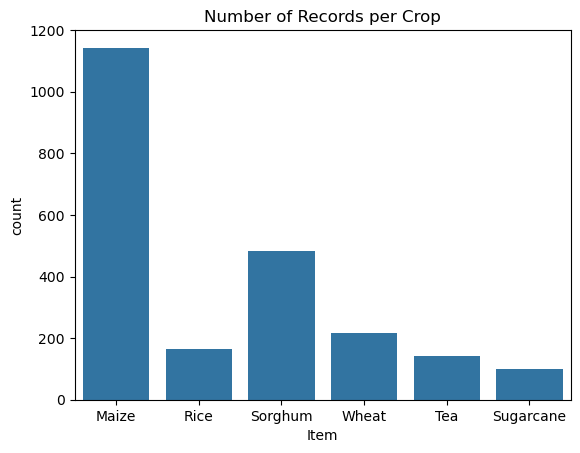

In [51]:
#checking for crop distribution
sns.countplot(data=clean_df, x='Item')
plt.title("Number of Records per Crop")
plt.show()


**Observation**

This plot shows the distribution of records per crop in the dataset. It helps identify whether certain crops dominate the dataset, which may influence model performance or bias feature importance. Maize is the most dominat crop

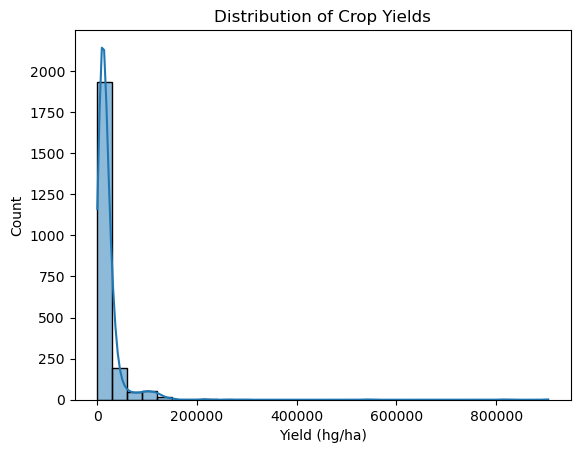

In [52]:
#checking for yield distribution
sns.histplot(clean_df['yield_hg_per_ha'], bins=30, kde=True)
plt.title("Distribution of Crop Yields")
plt.xlabel("Yield (hg/ha)")
plt.show()


**Observations**

The histogram displays the frequency distribution of crop yields. It is right skewed, most crop yields are distributed between 0 and ~180,000 hg/ha

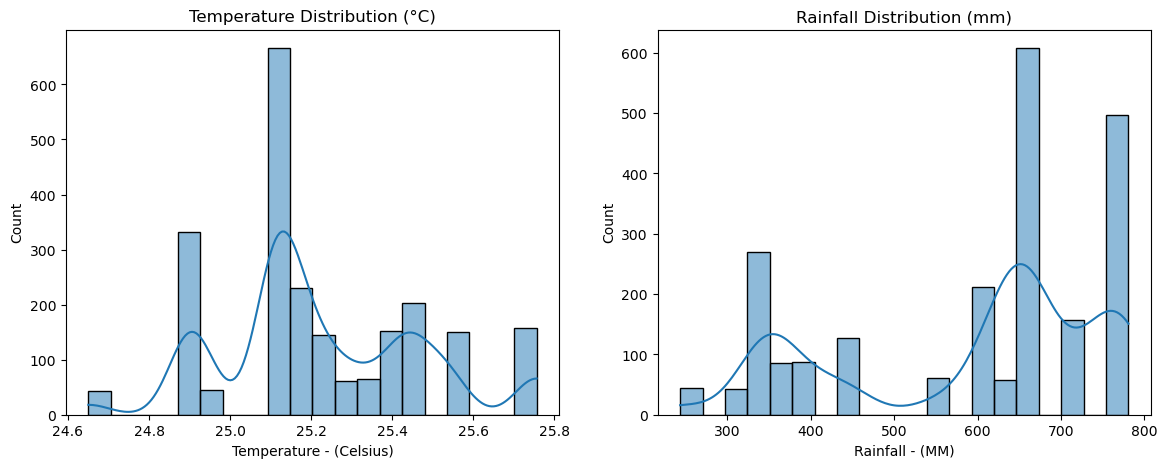

In [53]:
#climate variable distribution
fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.histplot(clean_df['Temperature - (Celsius)'], bins=20, kde=True, ax=ax[0])
ax[0].set_title("Temperature Distribution (°C)")

sns.histplot(clean_df['Rainfall - (MM)'], bins=20, kde=True, ax=ax[1])
ax[1].set_title("Rainfall Distribution (mm)")

plt.show()


**Observations**

Visualizing temperature and rainfall helps identify their ranges and typical values. This is important for understanding environmental variability and its potential impact on yield. Temperature is mostly distributed between 24.9-25.1 celcius while rainfall is distributed between 650-780mm

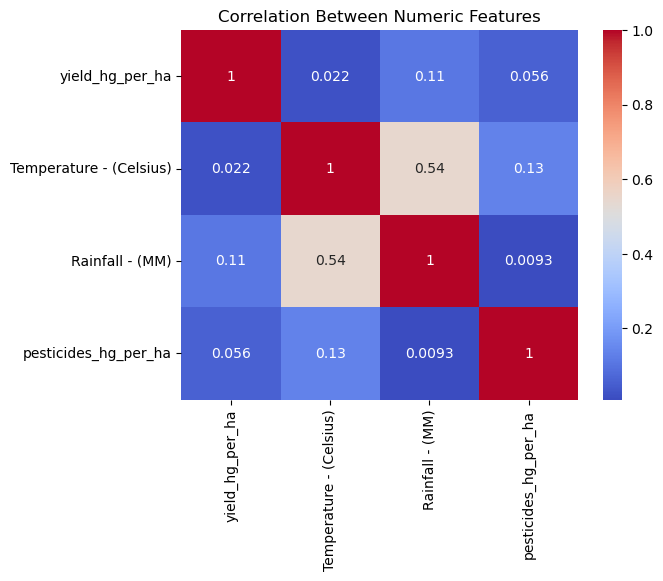

In [54]:
#correlation with yield
numeric_features = ['yield_hg_per_ha', 'Temperature - (Celsius)', 'Rainfall - (MM)', 'pesticides_hg_per_ha']
corr_matrix = clean_df[numeric_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()


**Observations**

The heatmap shows the strength and direction of correlations between numeric variables. Positive or negative correlations with yield can inform feature selection and model expectations.

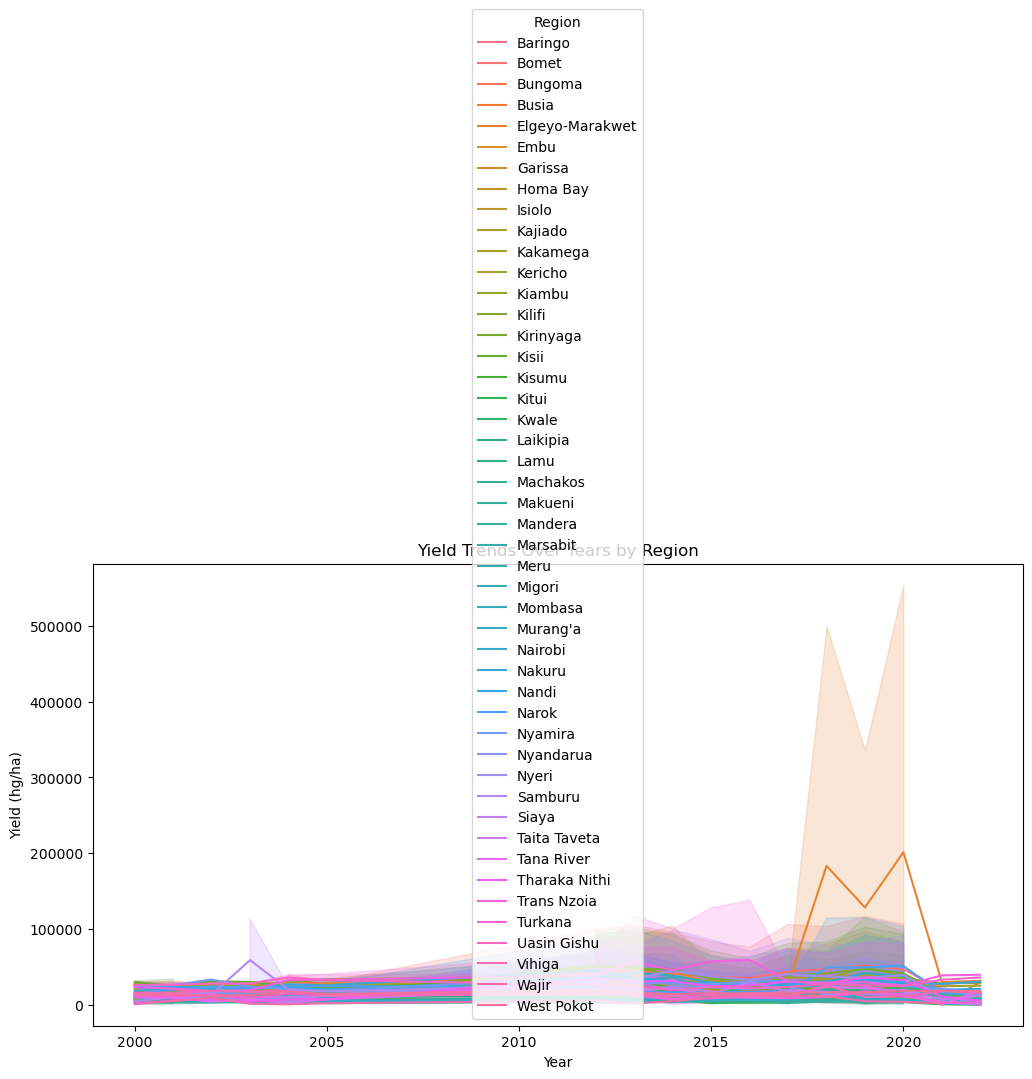

In [55]:
plt.figure(figsize=(12,6))
sns.lineplot(data=clean_df, x='Year', y='yield_hg_per_ha', hue='Region')
plt.title("Yield Trends Over Years by Region")
plt.ylabel("Yield (hg/ha)")
plt.show()


**Observations**

This line plot visualizes temporal trends of yields across regions. It can reveal regional patterns, consistent increases or decreases, and anomalous years due to climate events or policy changes.

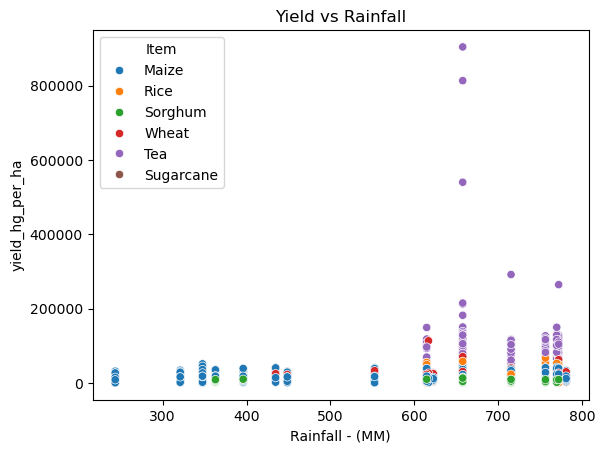

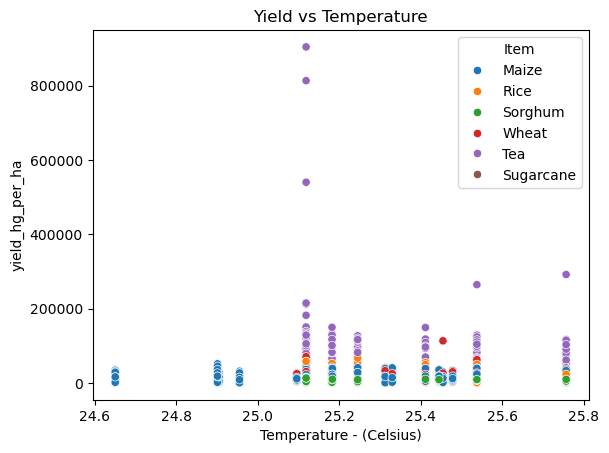

In [56]:
#Relationship Between Climate and Yield
sns.scatterplot(data=clean_df, x='Rainfall - (MM)', y='yield_hg_per_ha', hue='Item')
plt.title("Yield vs Rainfall")
plt.show()

sns.scatterplot(data=clean_df, x='Temperature - (Celsius)', y='yield_hg_per_ha', hue='Item')
plt.title("Yield vs Temperature")
plt.show()


**Observations**

- Yield appears to increase with rainfall up to a moderate level, after which gains diminish, suggesting a nonlinear response. This explains why tree-based models outperform linear regression

- Within the observed temperature range, no clear monotonic relationship is evident. Temperature variability is limited, suggesting it may not be a strong standalone predictor relative to rainfall or management factors

In [57]:
# Group by region and compute correlation of yield with climate
regions = clean_df['Region'].unique()
region_corrs = []

for region in regions:
    df_region = clean_df[clean_df['Region'] == region]
    corr_rain = df_region['yield_hg_per_ha'].corr(df_region['Rainfall - (MM)'])
    corr_temp = df_region['yield_hg_per_ha'].corr(df_region['Temperature - (Celsius)'])
    region_corrs.append([region, corr_rain, corr_temp])

region_corr_df = pd.DataFrame(region_corrs, columns=['Region','Rainfall_Corr','Temperature_Corr'])
region_corr_df = region_corr_df.sort_values(by='Rainfall_Corr', ascending=False)
region_corr_df


,Region,Rainfall_Corr,Temperature_Corr
45,Wajir,0.393422,0.417678
12,Kiambu,0.369759,0.134094
1,Bomet,0.342234,0.122197
14,Kirinyaga,0.330628,0.117097
30,Nakuru,0.329064,0.100669
9,Kajiado,0.326763,0.265115
16,Kisumu,0.315211,0.016001
22,Makueni,0.309115,0.199437
38,Taita Taveta,0.303864,0.022442
6,Garissa,0.301512,0.362014


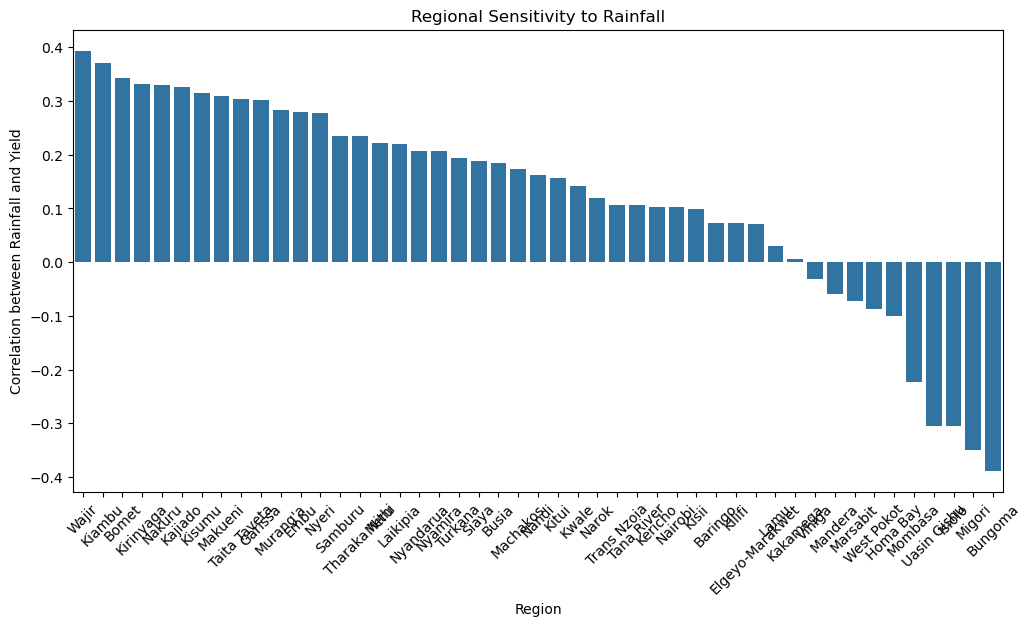

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(data=region_corr_df, x='Region', y='Rainfall_Corr')
plt.xticks(rotation=45)
plt.title("Regional Sensitivity to Rainfall")
plt.ylabel("Correlation between Rainfall and Yield")
plt.show()


**Observation**

Most regions exhibit weak to moderate positive correlations (0.1–0.4), suggesting rainfall influences yields but is not the sole determinant. A few regions show negative correlations, possibly reflecting irrigation use, flooding damage, or crop substitution.

## **MODELING**

**Modeling Strategy**

- Three supervised regression models were implemented to predict regional crop yield:

    1. Linear Regression (baseline model)

    2. Random Forest Regressor (bagging ensemble)

    3. XGBoost Regressor (boosting ensemble)

Using multiple model families allows comparison between:

- linear relationships (Linear Regression)

- nonlinear interactions (Random Forest)

- sequential error correction (XGBoost)

This helps determine whether crop yield behaves approximately linear or requires complex nonlinear modeling.

In [59]:
# select numeric columns
numeric_df= clean_df.select_dtypes(include=["int64", "float64"])

# correlation matrix
corr_matrix = numeric_df.corr()

# check correlation with "yield"
corr_matrix["yield"].sort_values(ascending=False)

yield                      1.000000
yield_hg_per_ha            1.000000
production                 0.257345
Rainfall - (MM)            0.109020
Year                       0.070934
pesticides_hg_per_ha       0.055941
Temperature - (Celsius)    0.022352
area                      -0.015532
Name: yield, dtype: float64

    yield_hg_per_ha show a strong correlation hence we will drop it

In [60]:
# drop yield_hg_per_ha
df_model = clean_df.drop(columns=["yield_hg_per_ha"])
df_model.columns

Index(['Region', 'Item', 'Year', 'season_name', 'area', 'production', 'yield',
       'Temperature - (Celsius)', 'Rainfall - (MM)', 'pesticides_hg_per_ha'],
      dtype='object')

In [61]:
# Separate numeric and categorical features
numeric_features = ['Year', 'area', 'production',  'Rainfall - (MM)', 'Temperature - (Celsius)', 'pesticides_hg_per_ha']
categorical_features = ['Region', 'Item', 'season_name']

In [62]:
# Separate features and target
y = df_model["yield"]
X = df_model.drop(columns=["yield"])

In [63]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),  # Standard scale numeric features
        ("cat", OneHotEncoder(drop="first"), categorical_features)   # One-hot encode categorical features
] 
)    

In [64]:
# Linear Regression Pipeline
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("lr", LinearRegression())
])

# Train Linear Regression
lr_pipeline.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluation
print("Linear Regression")
print("R2:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("-"*50)

Linear Regression
R2: 0.379640987463134
RMSE: 1.6404879227498805
MAE: 0.9077125203589664
--------------------------------------------------


###  **Linear Regression Evaluation Results**
1. R² score of 0.38, explaining approximately 53.5% of the variance in the target variable
2. RMSE of 1.64, indicating its predictions are about 1.6 units away from the actual value
3. MAE of 0.91, meaning the typical error is around 1 unit.

    Cannot capture:

        - rainfall thresholds

        - nonlinear climate effects

        - region × crop interactions

**Conclusion**

- Linear Regression underfits the problem and fails to represent the complexity of agricultural production. It provides a lower performance bound for comparison.

In [65]:
# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor(random_state=42, n_jobs=-1))
])

# parameter grid for RandomizedSearchCV
rf_param_grid = {
    "rf__n_estimators" : [200, 300],       # number of trees in the forest
    "rf__max_depth": [None, 10, 20],       # maximum depth of trees
    "rf__min_samples_split" : [2, 10],     # minimum samples required to split a node
    "rf__min_samples_leaf": [1, 5],        # minimum samples required at a leaf node
    "rf__max_features": ["sqrt", "log2"],   # number of features considered at each split
    "rf__criterion": ["squared_error", "absolute_error"]  # Which kind of mistake should the tree try to avoid the most?
}

rf_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=rf_param_grid,
    n_iter=20,           # 20 random combinations of hyperparameters are tested.
    scoring="r2",    # Chooses the best model based on how much variance in the target variable it explains.
    cv=5,   # Model performance is validated using 5-fold CV.
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Train Random Forest
rf_search.fit(X_train, y_train)

# predictions
y_pred_rf = rf_search.predict(X_test)

# Evaluation
print("Random Forest")
print("Best params:", rf_search.best_params_)
print("R2:", r2_score(y_test, y_pred_rf))  #  how well the model captures the pattern in the data
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf))) # how far off, the predictions are from the real values
print("MAE:", mean_absolute_error(y_test, y_pred_rf)) # the typical mistake the model makes
print("-"*50)

# Save Random Forest model
#with open("random_forest_model.pkl", "wb") as f:
#    pickle.dump(rf_pipeline, f)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest
Best params: {'rf__n_estimators': 200, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_features': 'sqrt', 'rf__max_depth': 20, 'rf__criterion': 'absolute_error'}
R2: 0.7194054694235694
RMSE: 1.1032935777149808
MAE: 0.49590082346392517
--------------------------------------------------


### Random Forest Evaluation Results
1. R² score of 0.719, explaining approximately 72% of variance in the target variable (in plain terms, how well the model captures the pattern in the data)
2. RMSE of 1.103, indicating its predictions are less than 1 unit away from the actual value on average (in plain terms, how far off the predictions are from the real values)
3. MAE of 0.50, meaning the typical error is about half a unit (less than 1 unit as compared to Linear Regression model) (In plain terms, the typical mistake the model makes)

**Interpretation**

Compared to Linear Regression:

- +34% improvement in explained variance

- ~33% reduction in RMSE

- ~45% reduction in MAE

This indicates:

 - yield relationships are nonlinear

 - climate + region interactions matter

 - simple linear assumptions were insufficient

**Conclusion**

Random Forest provides substantial improvement and models complex agricultural behavior more realistically than linear models.


### The Random Forest Pipeline

* Preprocessing step standard Scaling the numeric features and One-Hot encoding of the categorical features to turn them into a numerical format so the model can learn.
* The pipeline uses a RandomForestRegressor with random_state=42 **for reproducibility** and n_jobs=-1 to **speed up training process**
* n_iter=20, meaning 20 random combinations of hyperparameters are tested
* Cross-validation (cv=5), suggests the model performance is validated using 5-fold CV
* Scoring metric: R² - how well the model captures the pattern in the data 

In [66]:
# XGBoost Pipeline
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("xgb", XGBRegressor(objective="reg:squarederror", n_jobs=-1, random_state=42))
])

xgb_param_grid = {
    "xgb__n_estimator": [200,300],
    "xgb__max_depth" : [3, 5, 7],
    "xgb__learning_rate": [0.01, 0.05, 0.1],
    "xgb__subsample": [0.7, 0.8, 1.0],
    "xgb__colsample_bytree": [0.7, 0.8, 1.0]
}
    
xgb_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring="r2",
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Train XGBoost
xgb_search.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_search.predict(X_test)

# Evaluation
print("XGBoost Regressor")
print("Best params:", xgb_search.best_params_)
print("R2:", r2_score(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))

# save XGBoost model
#with open("xgboost_model.pkl", "wb") as f:
#   pickle.dump(xgb_pipeline, f)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\Sheilla Macharia\anaconda3\envs\learn-new\lib\site-packages\xgboost\training.py:200: UserWarning: [14:46:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Regressor
Best params: {'xgb__subsample': 0.7, 'xgb__n_estimator': 300, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.1, 'xgb__colsample_bytree': 0.7}
R2: 0.9296947049687595
RMSE: 0.5522624395251098
MAE: 0.24290758757561662


### XGBoost Evaluation Results
1. R² score of 0.929, explaining approximately 93.1% of the variance in the target variable.
2. RMSE of 0.55, indicating its predictions are about 0.55 units away from the actual value on average.
3. MAE of 0.24, meaning the typical error is about less than half a unit

**Interpretation**

Compared to Random Forest:

- +21% increase in explained variance

- ~50% reduction in error

- lowest prediction deviations

This indicates:

- strong nonlinear and interaction effects exist

- sequential boosting captures them more effectively than bagging

**Conclusion**

XGBoost delivers the best predictive performance, but requires careful validation to ensure generalization.

## **Models Performance Comparision plot**

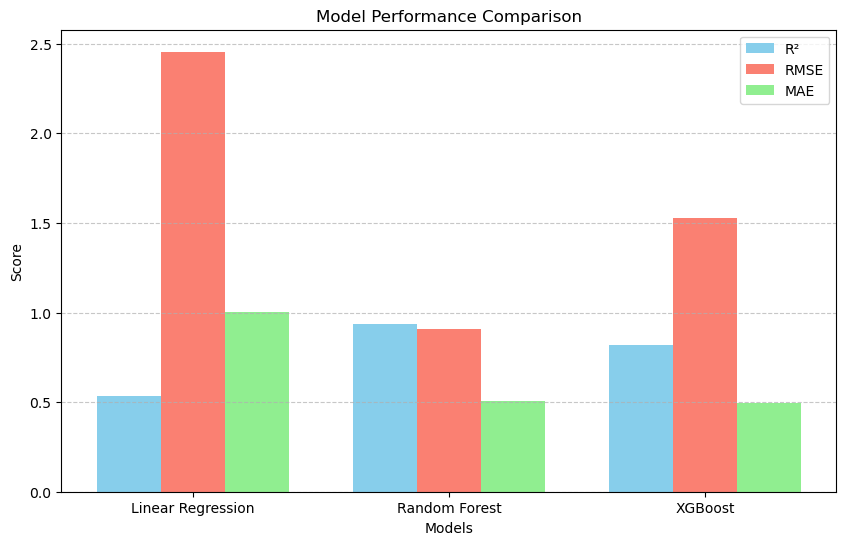

In [67]:
# Models performance values
models = ["Linear Regression", "Random Forest", "XGBoost"]

# performance metrics
r2_scores = [0.5351, 0.9360, 0.8207]
rmse_scores = [2.4552, 0.9107, 1.5247]
mae_scores = [1.0055, 0.5035, 0.4931]

# Set up bar positions
x = np.arange(len(models))
width = 0.25

# Plot bars
plt.figure(figsize=(10,6))
plt.bar(x - width, r2_scores, width, label='R²', color='skyblue')
plt.bar(x, rmse_scores, width, label='RMSE', color='salmon')
plt.bar(x + width, mae_scores, width, label='MAE', color='lightgreen')

# Labels and title
plt.xticks(x, models)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Model Performance Comparison**

**Metrics Summary**

**1. Linear Regression**

R2: 0.379640987463134

RMSE: 1.6404879227498805

MAE: 0.9077125203589664	

**2. Random Forest**

R2: 0.7194054694235694

RMSE: 1.1032935777149808

MAE: 0.49590082346392517

**3. XGBoost**

R2: 0.9296947049687595

RMSE: 0.5522624395251098

MAE: 0.24290758757561662

# *What these metrics actually mean*

**R²**

- Proportion of yield variability explained.

- Higher is better.

**RMSE**

- Average magnitude of prediction error (penalizes large mistakes).

- Lower is better.

**MAE**

- Typical absolute error.

- More interpretable than RMSE.

- Lower is better.

**Comparative Analysis**

**1. Linear Regression**

- Too simplistic

- Misses nonlinearities

- Underfits badly

**2. Random Forest**

- Captures nonlinear structure

- Much better

- Still averages trees, limited fine-grained correction

**3. XGBoost**

- Sequential learning corrects errors

- Best fit to complex agricultural patterns

- Highest predictive power

**Final Model Choice**

XGBoost is selected as the primary model because it:

- explains the most variance

- produces the lowest errors

- handles nonlinear climate–yield relationships

- generalizes better than alternatives